## Autism Screening Prediction with Machine Learning

The aim of this project is to **improve Autism Screening by creating predicting the likelihood of having this condition**.

As a basic workflow, we will navigate through the data and understand the data through visualisations.

Then, we will select 3 models and build a pipeline before training the data and making predictions.

The **Accuracy Score** will be used as the primary metric to measure model performance.

## 1. Importing data and libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/autism-screening-on-adults/autism_screening.csv")
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


### Column Descriptions:

* AX_Score: Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool AQ-10
* age: Age in years
* gender: Male or Female
* ethnicity: Ethnicities in text form
* jaundice: Whether or not the participant was born with jaundice?
* autism: Whether or not anyone in tbe immediate family has been diagnosed with autism?
* country_of_res: Countries in text format
* used_app_before: Whether the participant has used a screening app
* result: Score from the AQ-10 screening tool
* age_desc: Age as categorical
* relation: Relation of person who completed the test
* Class/ASD: Participant classification

## 2. Data Cleaning
This step involves cleaning and data handling to make it suitable for analysis. We start by understanding the data and then we can make necessary changes to make the data cleaner and also remove any outliers.

In [3]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [4]:
df.shape

(704, 21)

In [5]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


The describe method returns a statistical summary for all the statistical data (excludes any categorical variables).

A1 to A10 Score is a binary scoring system with only 0 and 1's. 

If we look at the **'age'** column, the max number for age is showing 383, which is most unlikely. I suspect this may be due to a typo error, but this is an outlier. 

Looking at the **count** row, we can see that age is missing 2 values. This gives us an indication that we need to either replace or remove the 2 missing values. 

In [6]:
#Let's view the row that has age of 383
df[df.age==383]


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,...,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO


In [7]:
df.drop(index=52, inplace = True)

# resetting index
df.reset_index(inplace = True)

In [8]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
index,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [9]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [10]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
index,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [11]:
#now we will have 703 samples after dropping the outlier row
df.shape

(703, 22)

In [12]:
df.dtypes

index                int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object

In [13]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']


In [14]:
df[object_cols].describe()

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
count,703,703,703,703,703,703,703,703,703
unique,2,12,2,2,67,2,1,6,2
top,m,White-European,no,no,United States,no,18 and more,Self,NO
freq,367,233,634,612,113,691,703,521,514


In [15]:
#More detailed information on categorical variables
for i in object_cols:
    print(df[i].value_counts())
    print('***'* 20)


gender
m    367
f    336
Name: count, dtype: int64
************************************************************
ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
others               1
Name: count, dtype: int64
************************************************************
jundice
no     634
yes     69
Name: count, dtype: int64
************************************************************
austim
no     612
yes     91
Name: count, dtype: int64
************************************************************
contry_of_res
United States           113
United Arab Emirates     82
India                    81
New Zealand              80
United Kingdom           77
                       ... 
China                     1
Chile                     1
Lebanon                   1
Burundi         

Already we are able to pick up some unknown categorical values. There are unknown values in **ethnicity** as well as **relation**. The country of residence list is too long, so let us check through that specific column to make sure it doesn't contain any unknown country.

In [16]:
#Check if there are any abnormalities in country of residence column
df['contry_of_res'].unique()

array(['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand',
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom',
       'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile',
       'France', 'China', 'Australia', 'Canada', 'Saudi Arabia',
       'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India',
       'Philippines', 'Sri Lanka', 'Sierra Leone', 'Ethiopia', 'Viet Nam',
       'Iran', 'Costa Rica', 'Germany', 'Mexico', 'Russia', 'Armenia',
       'Iceland', 'Nicaragua', 'Hong Kong', 'Japan', 'Ukraine',
       'Kazakhstan', 'AmericanSamoa', 'Uruguay', 'Serbia', 'Portugal',
       'Malaysia', 'Ecuador', 'Niger', 'Belgium', 'Bolivia', 'Aruba',
       'Finland', 'Turkey', 'Nepal', 'Indonesia', 'Angola', 'Azerbaijan',
       'Iraq', 'Czech Republic', 'Cyprus'], dtype=object)

Country column looks like they all have proper country names.

However, we will have to deal with the unknown values in the relations and ethnicity columns.


In [17]:
#Replace ? with Others and change the lower caps other category to the same 
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')

In [18]:
#check that the unknown ethnicity is replaced correctly
df['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

In [19]:
#replace relation with the most frequent occuring value 
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])

In [20]:
#check that the unknown relation is replaced with the mode
df['relation'].unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

In [21]:
#I like to double-check categorical variables again 
#for i in object_cols:
    #print(df[i].value_counts())
    #print('*****'* 10)


In [22]:
#Dropping unnecessary columns
df1 = df.drop(['age_desc', 'used_app_before','index'], axis=1)
df1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,no,no,Egypt,2.0,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,0,1,0,1,1,0,1,1,1,1,25.0,f,White-European,no,no,Russia,7.0,Self,YES
699,1,0,0,0,0,0,0,1,0,1,34.0,m,Hispanic,no,no,Mexico,3.0,Parent,NO
700,1,0,1,1,1,0,1,1,0,1,24.0,f,Others,no,no,Russia,7.0,Self,YES
701,1,0,0,1,1,0,1,0,1,1,35.0,m,South Asian,no,no,Pakistan,6.0,Self,NO


I'm also dropping a few other columns (age_desc, used_app_before) because these variables will not serve a purpose in training the model. 

In [23]:
#Changing the column names to more appropriate names
df1 = df1.rename(columns={"austim": "family_hx", "contry_of_res": "country_of_res","Class/ASD": "Autism"})

## 3. Exploratory Data Analysis

Now let us analyze and investigate the dataset and summarize the main characteristics by using data visualisations.


In [24]:
df1['Autism'].value_counts()

Autism
NO     514
YES    189
Name: count, dtype: int64

This shows that the data is slightly imbalanced as there are only 189 positive samples (patients with ACD) and 514 negative samples (patients without ACD). 

I learned that there is no fixed threshold as to when the data is imbalanced. Only when the imbalanced datasets of machine learning are extreme (i.e.90% for one class and 10% for the other) would typical optimization parameters or performance metrics be ineffective and require adjustment. So, it depends on you to determine the ratio, while of course a slight imbalance, such as 60:40, should not case noticeable performance reduction on a model.

For this case, since the ratio of our classes are 70:30, I wouldn't consider this as an imbalance that needs to be fixed. (We will also find out how our models perform once we make the predictions and make a comparison)

In [25]:
autism = df1[df1['Autism'] == 'YES']
no_autism = df1[df1['Autism'] == 'NO']

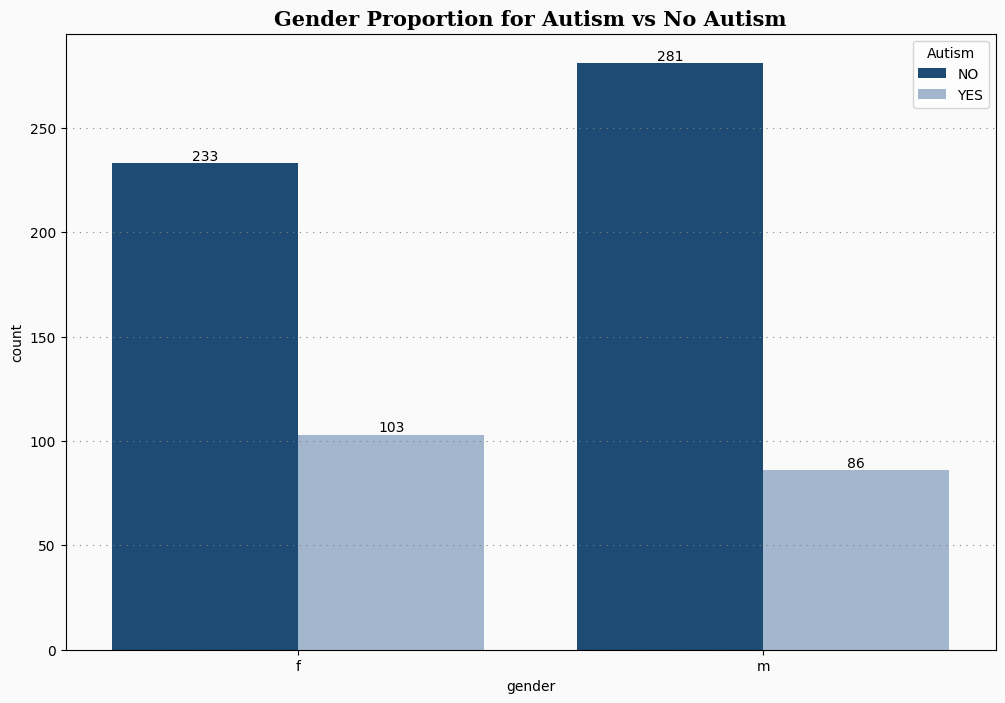

In [26]:
#set color and figure size
background_color = "#fafafa"
colors = "#0f4c81", "#9bb7d4"
fig = plt.figure(figsize=(12, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)

#add subplots and customizations
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

#plot
sns.countplot(data=df1, x='gender', hue='Autism', palette=colors, ax=ax0)

plt.title('Gender Proportion for Autism vs No Autism', fontsize=15, fontweight='bold', fontfamily='serif')

#inserting labels 
for i in ax0.containers:
    ax0.bar_label(i, label_type='edge')

plt.show()

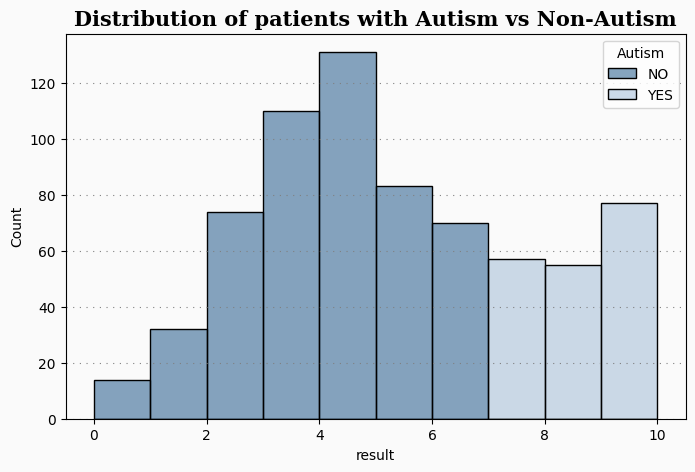

In [27]:
fig = plt.figure(figsize=(8, 5), facecolor=background_color)
gs = fig.add_gridspec(1, 1)

#add subplots and customizations
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


sns.histplot(data=df1, x="result", hue="Autism", bins=10, ax=ax0, palette=colors)

plt.title('Distribution of patients with Autism vs Non-Autism', fontsize=15, fontweight='bold', fontfamily='serif')

plt.show()

Using the histogram to find the distribution of results in our dataset, we can see that people who have scores of >= 7 are diagnosed with austism, while scores <7 are not diagnosed with autism. This will act as a significant feature when training the model.

In [28]:
county_sort = pd.DataFrame(autism['country_of_res'].value_counts())
country_sort =county_sort.sort_values(['count'], ascending=False).reset_index()
country_sort

,country_of_res,count
0,United States,53
1,United Kingdom,29
2,New Zealand,15
3,Australia,12
4,Canada,10
5,India,6
6,France,5
7,Brazil,5
8,Italy,4
9,Netherlands,4


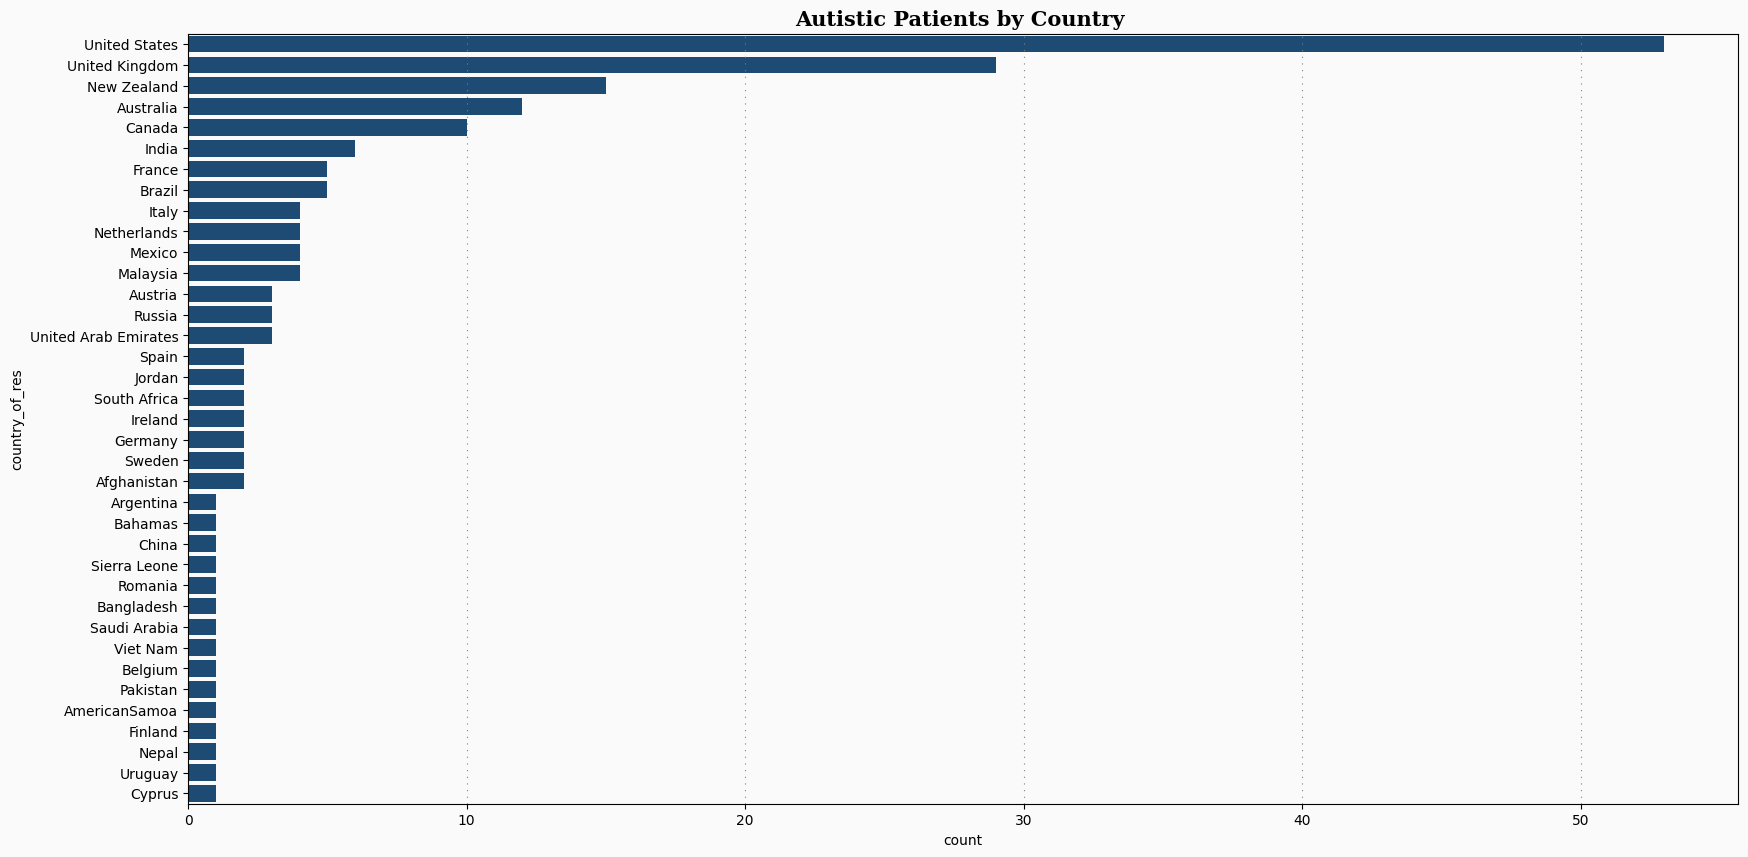

In [29]:
fig = plt.figure(figsize=(20, 10), dpi=100, facecolor=background_color)
gs = fig.add_gridspec(1, 1)

#add subplots and customizations
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))

sns.barplot(data=country_sort, x='count', y='country_of_res', color = '#0f4c81', ax=ax0 )

#for i in ax0.containers:
#    ax0.bar_label(i, label_type='edge')
plt.title('Autistic Patients by Country ', fontsize=15, fontweight='bold', fontfamily='serif')

plt.show()

## 4. Data Pre-Processing

In [30]:
#splitting the data
X = df1.drop("Autism", axis = 1)    # select all other feature except "Class/ASD" for training
y = df1[['Autism']]

In [31]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,family_hx,country_of_res,result,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,6.0,Self
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,5.0,Self
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,8.0,Parent
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,6.0,Self
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,no,no,Egypt,2.0,Self
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,0,1,0,1,1,0,1,1,1,1,25.0,f,White-European,no,no,Russia,7.0,Self
699,1,0,0,0,0,0,0,1,0,1,34.0,m,Hispanic,no,no,Mexico,3.0,Parent
700,1,0,1,1,1,0,1,1,0,1,24.0,f,Others,no,no,Russia,7.0,Self
701,1,0,0,1,1,0,1,0,1,1,35.0,m,South Asian,no,no,Pakistan,6.0,Self


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [33]:
print(f"Number of samples in X_train dataset: {X_train.shape}")
print(f"Number of samples in y_train dataset:{y_train.shape}")
print(f"Number of samples in y_test dataset: {y_test.shape}")
print(f"Number of samples in X_test dataset: {X_test.shape}")


Number of samples in X_train dataset: (527, 18)
Number of samples in y_train dataset:(527, 1)
Number of samples in y_test dataset: (176, 1)
Number of samples in X_test dataset: (176, 18)


In [34]:
X_train.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,family_hx,country_of_res,result,relation
182,0,0,1,1,1,0,0,0,0,1,34.0,m,Asian,no,no,New Zealand,4.0,Self
646,1,0,1,0,0,1,0,1,0,1,18.0,m,White-European,yes,no,Angola,5.0,Parent
253,1,0,1,0,0,0,1,0,0,0,36.0,m,White-European,no,no,New Zealand,3.0,Self
293,0,0,0,0,0,0,0,0,0,0,40.0,f,Middle Eastern,no,no,Afghanistan,0.0,Parent
566,1,1,0,0,0,0,1,1,0,0,48.0,m,White-European,no,no,Australia,4.0,Self
568,1,0,1,1,0,0,0,0,0,0,34.0,f,White-European,no,no,United Kingdom,3.0,Self
261,1,0,0,0,0,0,1,1,0,0,26.0,m,Asian,no,no,India,3.0,Self
274,0,1,1,1,0,0,0,0,1,0,26.0,m,Asian,no,no,India,4.0,Others
197,1,1,1,0,1,1,0,1,1,0,31.0,m,White-European,no,no,United States,7.0,Self
501,0,1,0,0,1,0,1,1,0,0,37.0,m,White-European,no,no,Belgium,4.0,Self


In [35]:
y_train.head(10)

,Autism
182,NO
646,NO
253,NO
293,NO
566,NO
568,NO
261,NO
274,NO
197,YES
501,NO


In [36]:
# Instead of writing out the full list above, we could use these pandas methods:
numeric_features = X_train.select_dtypes('float64').columns
categorical_features = X_train.select_dtypes('object').columns

In [37]:
numeric_features

Index(['age', 'result'], dtype='object')

In [38]:
categorical_features

Index(['gender', 'ethnicity', 'jundice', 'family_hx', 'country_of_res',
       'relation'],
      dtype='object')

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [40]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [41]:
#We'll be using a ColumnTransformer for this bit. Let's combine these transformation pipelines.
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ], remainder="passthrough"
)

In [42]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['age', 'result'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['gender', 'ethnicity', 'jundice', 'family_hx', 'country_of_res',
       'relation'],
      dtype='object'))])

When we fit with the column transformer(preprocessor), it calls fit on all the transformers.

And when we transform with the preprocessor, it calls transform on all the transformers.

In [43]:
#To access the columns that were one hot encoded, Let’s say I wanted to see the newly created columns from One-hot-encoding

onehot_cols = (
    preprocessor
    .named_transformers_["categorical"]
    .named_steps["onehot"]
    .get_feature_names_out(categorical_features)
)
onehot_cols

array(['gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Middle Eastern ', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish',
       'ethnicity_White-European', 'jundice_no', 'jundice_yes',
       'family_hx_no', 'family_hx_yes', 'country_of_res_Afghanistan',
       'country_of_res_AmericanSamoa', 'country_of_res_Angola',
       'country_of_res_Armenia', 'country_of_res_Aruba',
       'country_of_res_Australia', 'country_of_res_Austria',
       'country_of_res_Azerbaijan', 'country_of_res_Bahamas',
       'country_of_res_Bangladesh', 'country_of_res_Belgium',
       'country_of_res_Brazil', 'country_of_res_Burundi',
       'country_of_res_Canada', 'country_of_res_China',
       'country_of_res_Cyprus', 'country_of_res_Egypt',
       'country_of_res_Ethiopia', 'country_of_res_France',
       'country_of_res_Germany', 'country_of_res_Hong Kong',
       'country_of_re

In [44]:
#Combining this with the numeric feature names gives us all the column names.

columns = numeric_features.tolist() + onehot_cols.tolist()
columns

['age',
 'result',
 'gender_f',
 'gender_m',
 'ethnicity_Asian',
 'ethnicity_Black',
 'ethnicity_Hispanic',
 'ethnicity_Latino',
 'ethnicity_Middle Eastern ',
 'ethnicity_Others',
 'ethnicity_Pasifika',
 'ethnicity_South Asian',
 'ethnicity_Turkish',
 'ethnicity_White-European',
 'jundice_no',
 'jundice_yes',
 'family_hx_no',
 'family_hx_yes',
 'country_of_res_Afghanistan',
 'country_of_res_AmericanSamoa',
 'country_of_res_Angola',
 'country_of_res_Armenia',
 'country_of_res_Aruba',
 'country_of_res_Australia',
 'country_of_res_Austria',
 'country_of_res_Azerbaijan',
 'country_of_res_Bahamas',
 'country_of_res_Bangladesh',
 'country_of_res_Belgium',
 'country_of_res_Brazil',
 'country_of_res_Burundi',
 'country_of_res_Canada',
 'country_of_res_China',
 'country_of_res_Cyprus',
 'country_of_res_Egypt',
 'country_of_res_Ethiopia',
 'country_of_res_France',
 'country_of_res_Germany',
 'country_of_res_Hong Kong',
 'country_of_res_Iceland',
 'country_of_res_India',
 'country_of_res_Indonesi

## 4. Models
There are a number of machine learning models commonly used for Binary Classification problems, such as Logistic Regression. K-Nearest Neighbours, Decision Trees, Support Vector Machine, and Naive Bayes. 

In this kernel, I will be using the following models:
1. Logistic Regression (LR)
2. Random Forest
3. SVM

It is important to note that ML models like LR and SVM do not support more than 2 classes as the target. We will also be using 10-fold cross validation method.



In [45]:
logreg_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor), # <-- this is the ColumnTransformer we just created
        ("logreg", LogisticRegression())])

rf_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor), # <-- this is the ColumnTransformer we just created
        ("RF", RandomForestClassifier())])

svm_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor), # <-- this is the ColumnTransformer we just created
        ("svm", SVC())])

In [46]:
from sklearn.model_selection import cross_validate
logreg_cv = cross_validate(logreg_pipe, X_train, y_train, return_train_score=True)
rf_cv = cross_validate(rf_pipe, X_train, y_train, return_train_score=True)
svm_cv = cross_validate(svm_pipe, X_train, y_train, return_train_score=True)


In [47]:
logreg_score = pd.DataFrame(logreg_cv)
rf_score = pd.DataFrame(rf_cv)
svm_score = pd.DataFrame(svm_cv)
print(f"Logistic Regression mean:\n{logreg_score.mean()}")
print("***"*15)
print(f"Random Forest mean: \n{rf_score.mean()}")
print("***"*15)
print(f"SVM mean:\n {svm_score.mean()}")

Logistic Regression mean:
fit_time       0.025957
score_time     0.010239
test_score     0.996190
train_score    1.000000
dtype: float64
*********************************************
Random Forest mean: 
fit_time       0.156238
score_time     0.016366
test_score     1.000000
train_score    1.000000
dtype: float64
*********************************************
SVM mean:
 fit_time       0.017356
score_time     0.010509
test_score     0.982911
train_score    0.997629
dtype: float64


There are a lot of steps happening in ColumnTransformer, we can use set_config from sklearn and it will display a diagram of what is going on in our pipeline.

In [48]:
rf_pipe.fit(X_train,y_train)
svm_pipe.fit(X_train,y_train)
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'result'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'ethnicity', 'jundice', 'family_hx', 'country_of_res',
       'relation'],
      dtype='object'))])),
                ('logreg', LogisticRegression())])

## 5. Making predictions on test data

In [49]:
rf_pred = rf_pipe.predict(X_test)
svm_pred = svm_pipe.predict(X_test)
logreg_pred = logreg_pipe.predict(X_test)

In [50]:
rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred)

In [51]:
# Evaluate pipeline performance
print("Logistic Regression performance score:", logreg_pipe.score(X_test, y_test))
print("Random Forest performance score:", rf_pipe.score(X_test, y_test))
print("SVM performance score:", svm_pipe.score(X_test, y_test))

Logistic Regression performance score: 1.0
Random Forest performance score: 1.0
SVM performance score: 0.9886363636363636


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

def draw():
    print("***"*20)

print(classification_report(y_test,logreg_pred))
draw()
print(classification_report(y_test,rf_pred))
draw()
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       127
         YES       1.00      1.00      1.00        49

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176

************************************************************
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       127
         YES       1.00      1.00      1.00        49

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176

************************************************************
              precision    recall  f1-score   support

          NO       1.00      0.98      0.99       127
         YES       0.96      1.00      0.98        49

    accuracy                           0.99       176
   mac

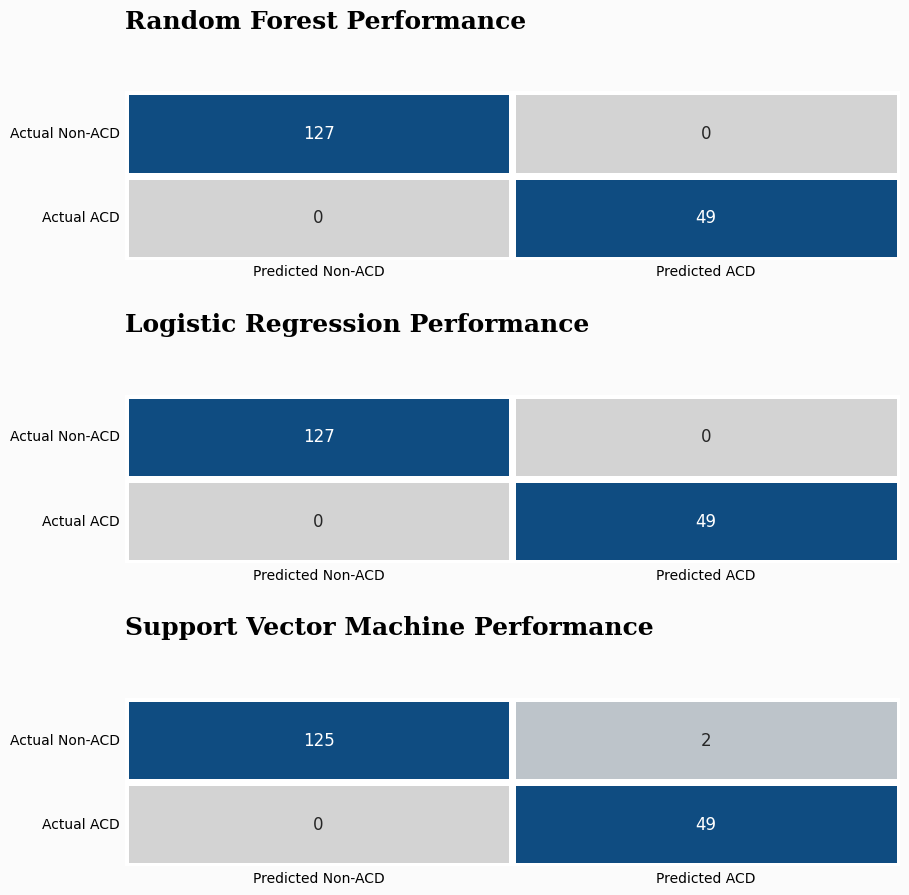

In [53]:
# Plotting our results
import matplotlib

colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,14)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :])
ax0.set_facecolor(background_color) # axes background color

# Overall
sns.heatmap(rf_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,annot_kws={"fontsize":12},yticklabels=['Actual Non-ACD','Actual ACD'],xticklabels=['Predicted Non-ACD','Predicted ACD'])

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,annot_kws={"fontsize":12},yticklabels=['Actual Non-ACD','Actual ACD'],xticklabels=['Predicted Non-ACD','Predicted ACD'])

sns.heatmap(svm_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,annot_kws={"fontsize":12},yticklabels=['Actual Non-ACD','Actual ACD'],xticklabels=['Predicted Non-ACD','Predicted ACD'])

ax0.tick_params(axis=u'both', which=u'both',length=0)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_facecolor(background_color) 
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_facecolor(background_color)



ax1.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax2.text(0,-0.75,'Support Vector Machine Performance',fontsize=18,fontweight='bold',fontfamily='serif')

plt.show()

## 6. Conclusion

The random forest model has the highest accuracy score (100%) while the LR and SVM model both had an accuracy score of (99%).

This dataset is quite small and I have my suspicions on the 3 models we have test on have close to/ 100% accuracy score. Though it appears quite clear that by assesing the survey done, patients who have a result of more or equal than 7 would very much likely be an ACD patient. 

Please leave a comment if you have any insights or like my work. I will definitely come back to relook on the work that I've done as I gain more knowledge on machine learning and expand my skills. 

Thank you. :)
